In [3]:
import pandas as pd
import numpy as np

# matplotlib
from matplotlib import pyplot as plt
# plotly
# import plotly
#seaborn
import seaborn as sns
#plotly express
import plotly.express as px

# stats
from scipy import stats

# qqplot
# from statsmodels.graphics.gofplots import qqplot

# Data

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'
conn_str = f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}'
query = '''
SELECT *
FROM useducation
'''
df = pd.read_sql_query(query, con=conn_str)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


## Data Cleaning

### Missing values

In [5]:
# fill missing values with interpolation
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = df["STATE"].unique()

for state in states:
    df.loc[df["STATE"] == state, fill_list] = df.loc[df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
df.dropna(inplace=True)

# Assignment

## 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [6]:
# view the descriptive stats
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


* the total_revenue is less than total_expenditure
* the highest revenue source is state and then local
* instruction_expenditure is over half of total_expenditure it seems
* avg_math is higher than avg_reading
* the distribution on avg_math is more flat than avg_reading

## 2. Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [7]:
ms_df = df[df.STATE == "MISSISSIPPI"]

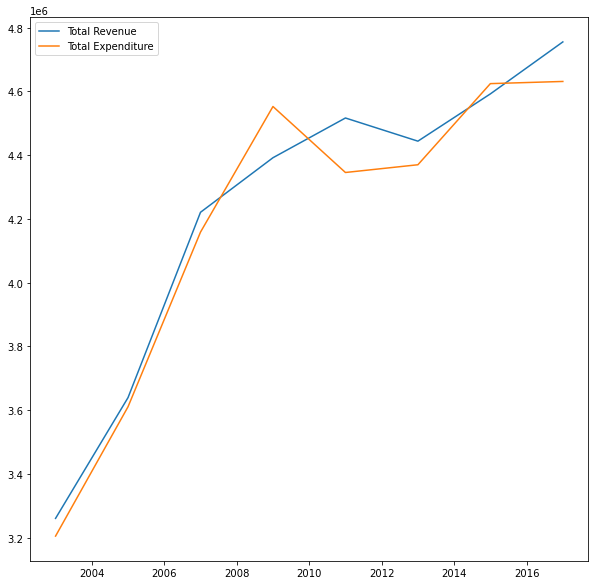

In [8]:
# line graph of revenue and expenditures over the years
plt.figure(figsize=(10,10))
plt.plot(ms_df.YEAR, ms_df.TOTAL_REVENUE, label="Total Revenue")
plt.plot(ms_df.YEAR, ms_df.TOTAL_EXPENDITURE, label="Total Expenditure")
plt.legend()
plt.show()

## 3. In your chosen state, in which of the lessons are the students more successful—math or reading?

In [9]:
math_by_year = ms_df.groupby('YEAR')[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE']].mean()
reading_by_year = ms_df.groupby('YEAR')[['AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].mean()
print(math_by_year)
print(reading_by_year)

      AVG_MATH_4_SCORE  AVG_MATH_8_SCORE
YEAR                                    
2003        222.890601        260.911934
2005        226.698845        262.456243
2007        227.612377        264.890919
2009        227.262261        265.001958
2011        229.868022        269.235646
2013        231.105721        271.160967
2015        234.243053        270.580479
2017        234.694193        270.914908
      AVG_READING_4_SCORE  AVG_READING_8_SCORE
YEAR                                          
2003           205.464407           266.011690
2005           204.393607           263.938418
2007           207.809519           253.238294
2009           210.506518           267.706500
2011           209.188020           271.222897
2013           208.518536           277.009559
2015           214.110687           264.496755
2017           215.203306           268.616822


> The math and reading 8 scores are fairly consistent but the reading 4 scores are significantly lower than math 4 scores

## 4. What are the distributions of the math and reading scores in the sample?

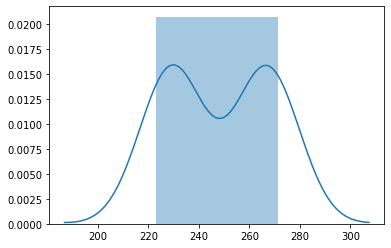

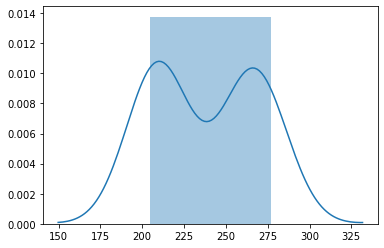

In [12]:
math = ms_df[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE']]
reading = ms_df[['AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]
sns.distplot(math)
plt.show()
sns.distplot(reading)

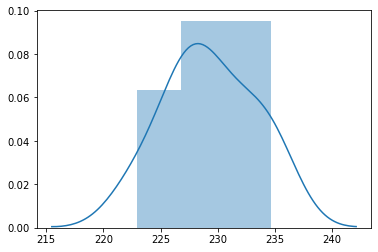

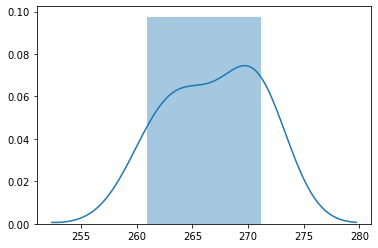

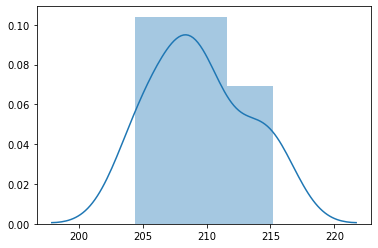

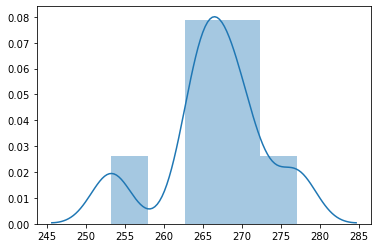

In [13]:
math4 = ms_df[['AVG_MATH_4_SCORE']]
math8 = ms_df[['AVG_MATH_8_SCORE']]
reading4 = ms_df[['AVG_READING_4_SCORE']]
reading8 = ms_df[['AVG_READING_8_SCORE']]

sns.distplot(math4)
plt.show()
sns.distplot(math8)
plt.show()
sns.distplot(reading4)
plt.show()
sns.distplot(reading8)
plt.show()

> all sets of scores appear to be relatively normal although the sample sizes are small

## 5. Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

### Original Distributions

In [33]:
raw_df = pd.read_sql_query(query, con=conn_str)

In [34]:
fill_cols = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

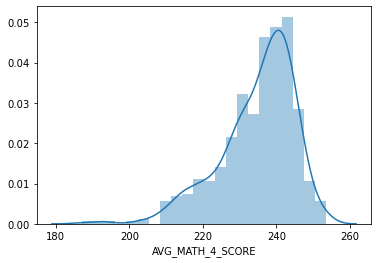

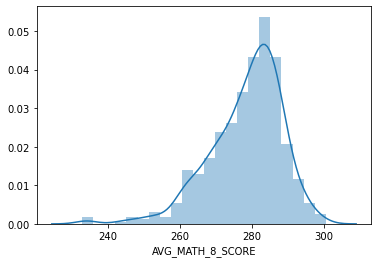

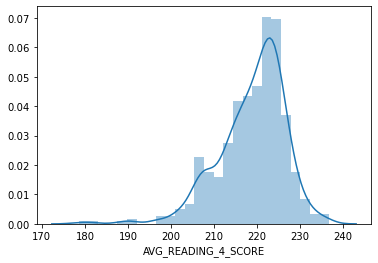

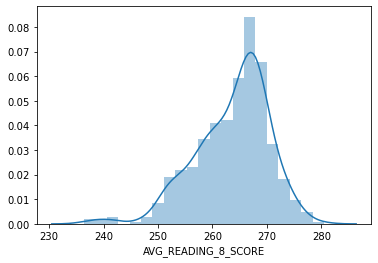

In [35]:
# original distribution for scores
for column in fill_cols:
    sns.distplot(raw_df[column])
    plt.show()

### Mean

In [36]:
# fill missing values with mean

for state in states:
    for column in fill_cols:
        raw_df.loc[raw_df["STATE"] == state, column] = raw_df.loc[raw_df["STATE"] == state, column].mean()

# we drop the null values after fill
raw_df.dropna(inplace=True)

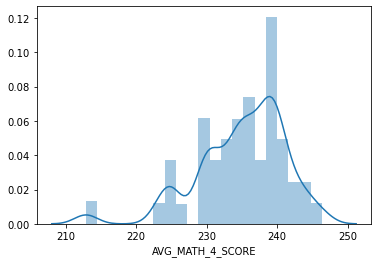

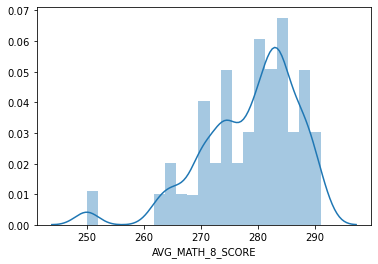

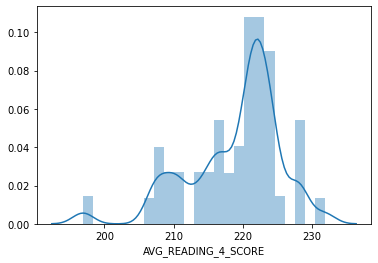

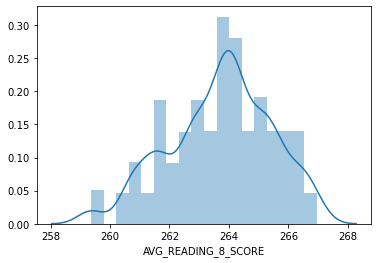

In [37]:
# distribution for scores with filled means
for column in fill_cols:
    sns.distplot(raw_df[column])
    plt.show()

### Median values

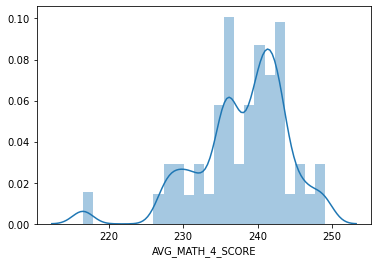

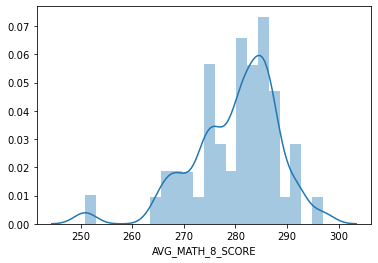

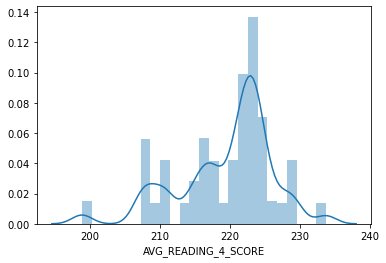

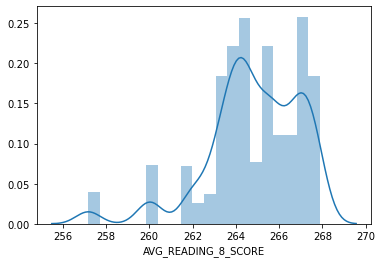

In [39]:
raw_df = pd.read_sql_query(query, con=conn_str)

# fill missing values with mean

for state in states:
    for column in fill_cols:
        raw_df.loc[raw_df["STATE"] == state, column] = raw_df.loc[raw_df["STATE"] == state, column].median()

# we drop the null values after fill
raw_df.dropna(inplace=True)

# distribution for scores with filled medians
for column in fill_cols:
    sns.distplot(raw_df[column])
    plt.show()

### Interpolation

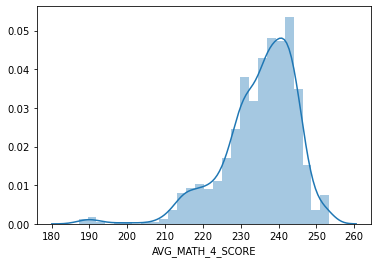

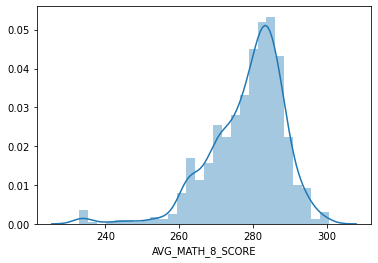

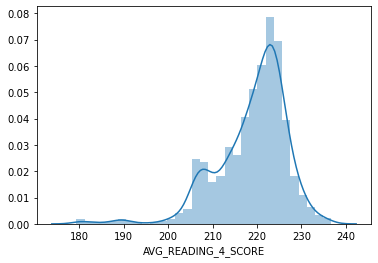

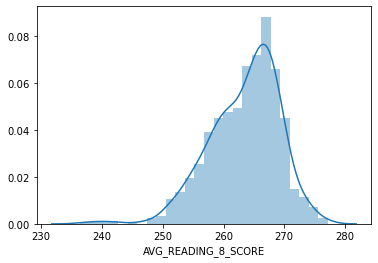

In [40]:
raw_df = pd.read_sql_query(query, con=conn_str)

# fill missing values with mean

for state in states:
    for column in fill_cols:
        raw_df.loc[raw_df["STATE"] == state, column] = raw_df.loc[raw_df["STATE"] == state, column].interpolate()

# we drop the null values after interpolation
raw_df.dropna(inplace=True)

# distribution for scores with filled medians
for column in fill_cols:
    sns.distplot(raw_df[column])
    plt.show()

> The interpolation fills results in a more continuous and less choppy distribution

> The median fill results in a distribution more centralized to the middle values